In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
prsa_data = pd.read_csv("PRSA_Data.csv")
prsa_data.head()

,Unnamed: 0,No,SO2,NO2,CO,O3,PRES,RAIN,wd,WSPM,AQI Label
0,0,1,6.0,28.0,400.0,51.577659,1023.0,0.0,NNW,4.4,Severely Polluted
1,1,2,6.0,28.0,400.0,50.403851,1023.2,0.0,N,4.7,Severely Polluted
2,2,3,-1.0,19.0,400.0,54.923321,1023.5,0.0,NNW,5.6,Severely Polluted
3,3,4,8.0,14.0,-1.0,-1.000000,1024.5,0.0,NW,3.1,Excellent
4,4,5,9.0,-1.0,300.0,54.296608,1025.2,0.0,N,2.0,Heavily Polluted


In [3]:
prsa_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  35064 non-null  int64  
 1   No          35064 non-null  int64  
 2   SO2         35064 non-null  float64
 3   NO2         35064 non-null  float64
 4   CO          35064 non-null  float64
 5   O3          35064 non-null  float64
 6   PRES        35064 non-null  float64
 7   RAIN        35064 non-null  float64
 8   wd          35064 non-null  object 
 9   WSPM        35064 non-null  float64
 10  AQI Label   35064 non-null  object 
dtypes: float64(7), int64(2), object(2)
memory usage: 2.9+ MB


In [4]:
prsa_data.describe()

,Unnamed: 0,No,SO2,NO2,CO,O3,PRES,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000
mean,17531.500000,17532.500000,18.058734,63.236861,1251.121692,45.876835,1010.520250,0.067653,1.500217
std,10122.249256,10122.249256,22.558126,39.109232,1269.033556,54.730861,26.289217,0.896833,1.105382
min,0.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,8765.750000,8766.750000,4.000000,34.000000,500.000000,2.397428,1002.500000,0.000000,0.800000
50%,17531.500000,17532.500000,10.000000,58.000000,900.000000,27.356346,1010.800000,0.000000,1.200000
75%,26297.250000,26298.250000,22.276800,87.000000,1500.000000,69.548316,1019.400000,0.000000,2.000000
max,35063.000000,35064.000000,282.000000,264.000000,10000.000000,363.769133,1040.300000,72.500000,11.200000


In [5]:
prsa_data[prsa_data == -1] = np.nan
prsa_data.head()

,Unnamed: 0,No,SO2,NO2,CO,O3,PRES,RAIN,wd,WSPM,AQI Label
0,0,1,6.0,28.0,400.0,51.577659,1023.0,0.0,NNW,4.4,Severely Polluted
1,1,2,6.0,28.0,400.0,50.403851,1023.2,0.0,N,4.7,Severely Polluted
2,2,3,NaN,19.0,400.0,54.923321,1023.5,0.0,NNW,5.6,Severely Polluted
3,3,4,8.0,14.0,NaN,NaN,1024.5,0.0,NW,3.1,Excellent
4,4,5,9.0,NaN,300.0,54.296608,1025.2,0.0,N,2.0,Heavily Polluted


<Axes: xlabel='SO2', ylabel='Count'>

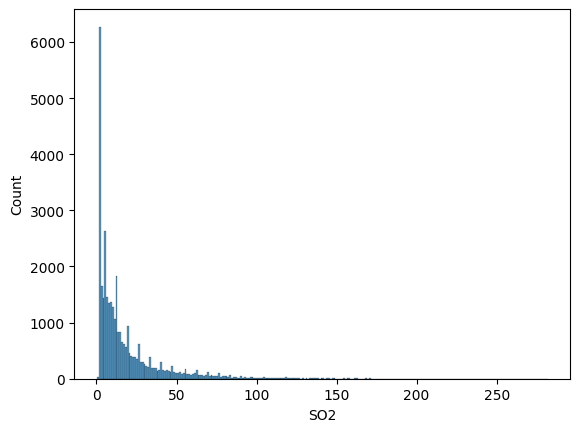

In [6]:
sns.histplot(prsa_data.SO2)

<Axes: xlabel='NO2', ylabel='Density'>

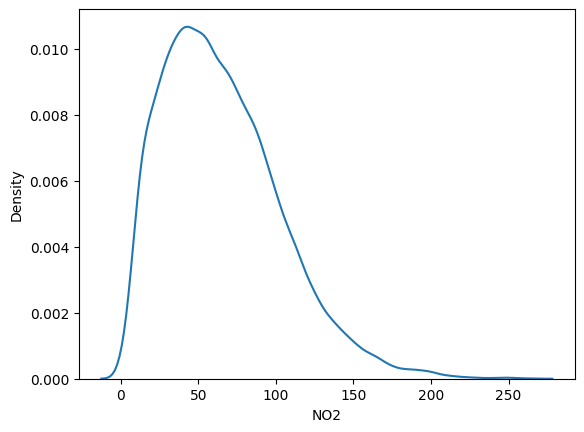

In [7]:
sns.kdeplot(prsa_data.NO2)

In [8]:
prsa_data.RAIN[prsa_data.RAIN > 0]

267      0.1
268      0.4
269      0.1
270      0.9
271      0.9
        ... 
34891    0.2
34892    0.7
34893    0.9
34894    0.4
34895    0.2
Name: RAIN, Length: 1436, dtype: float64

In [14]:
is_rain = np.array(prsa_data.RAIN)
is_rain[is_rain > 0] = 1
prsa_data['IS_RAIN'] = is_rain
prsa_data.drop(['RAIN'], axis=1, inplace=True)
prsa_data.describe()

AttributeError: 'DataFrame' object has no attribute 'RAIN'

<Axes: xlabel='SO2', ylabel='Density'>

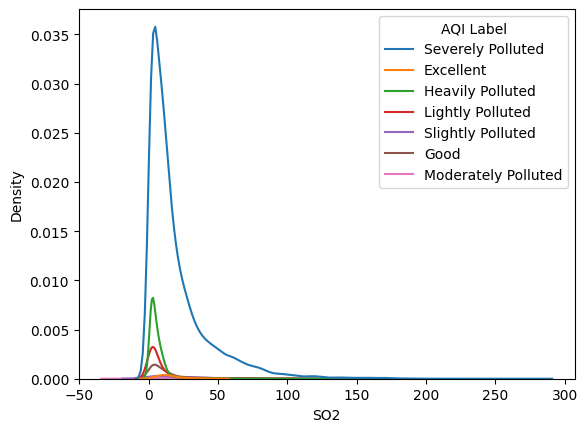

In [15]:
sns.kdeplot(data=prsa_data, x="SO2", hue="AQI Label")

In [16]:
bin_ranges = [0, 250, 320, 10000]
bin_names = [1, 2, 3]
prsa_data['CO_bin_custom_label'] = pd.cut(np.array(prsa_data['CO']), 
                                               bins=bin_ranges, labels=bin_names)
prsa_data.head()

,Unnamed: 0,No,SO2,NO2,CO,O3,PRES,wd,WSPM,AQI Label,IS_RAIN,CO_bin_custom_label
0,0,1,6.0,28.0,400.0,51.577659,1023.0,NNW,4.4,Severely Polluted,0.0,3
1,1,2,6.0,28.0,400.0,50.403851,1023.2,N,4.7,Severely Polluted,0.0,3
2,2,3,NaN,19.0,400.0,54.923321,1023.5,NNW,5.6,Severely Polluted,0.0,3
3,3,4,8.0,14.0,NaN,NaN,1024.5,NW,3.1,Excellent,0.0,NaN
4,4,5,9.0,NaN,300.0,54.296608,1025.2,N,2.0,Heavily Polluted,0.0,2


In [17]:
prsa_data['CO_bin_custom_label'] = prsa_data['CO_bin_custom_label'].values.add_categories(0)
prsa_data['CO_bin_custom_label'] = prsa_data['CO_bin_custom_label'].fillna(0).astype(int)
prsa_data.head()

,Unnamed: 0,No,SO2,NO2,CO,O3,PRES,wd,WSPM,AQI Label,IS_RAIN,CO_bin_custom_label
0,0,1,6.0,28.0,400.0,51.577659,1023.0,NNW,4.4,Severely Polluted,0.0,3
1,1,2,6.0,28.0,400.0,50.403851,1023.2,N,4.7,Severely Polluted,0.0,3
2,2,3,NaN,19.0,400.0,54.923321,1023.5,NNW,5.6,Severely Polluted,0.0,3
3,3,4,8.0,14.0,NaN,NaN,1024.5,NW,3.1,Excellent,0.0,0
4,4,5,9.0,NaN,300.0,54.296608,1025.2,N,2.0,Heavily Polluted,0.0,2


In [18]:
prsa_data.PRES[prsa_data.PRES <= 992] = 992
prsa_data.PRES[prsa_data.PRES >= 1034] = 1034

<Axes: >

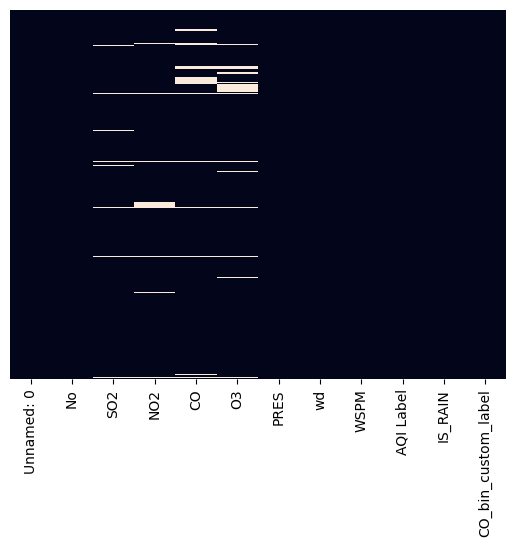

In [19]:
sns.heatmap(prsa_data.isnull(), yticklabels=False, cbar=False)

In [20]:
undef = prsa_data.isnull().sum(axis=1)
undef[undef >= 2]

3        2
276      3
435      2
459      2
555      2
        ..
34880    4
34883    4
34885    4
35029    2
35030    2
Length: 884, dtype: int64

In [21]:
prsa_data = prsa_data.drop(undef[undef >= 2].index, axis=0)

In [22]:
prsa_data.isnull().sum()

Unnamed: 0                0
No                        0
SO2                     281
NO2                     702
CO                     1028
O3                     1300
PRES                      0
wd                        0
WSPM                      0
AQI Label                 0
IS_RAIN                   0
CO_bin_custom_label       0
dtype: int64

In [23]:
prsa_data.SO2 = prsa_data.SO2.fillna(prsa_data.PRES.mean())

In [24]:
filler = prsa_data.O3[prsa_data.O3.isna()]

In [25]:
filler = prsa_data.O3[~prsa_data.O3.isna()].sample(n=len(filler)).set_axis(filler.index)

In [26]:
prsa_data.O3 = prsa_data.O3.fillna(filler)

In [27]:
prsa_data['O3'] = np.array(np.round((prsa_data['O3'])), dtype='int')
prsa_data.head()

,Unnamed: 0,No,SO2,NO2,CO,O3,PRES,wd,WSPM,AQI Label,IS_RAIN,CO_bin_custom_label
0,0,1,6.000000,28.0,400.0,52,1023.0,NNW,4.4,Severely Polluted,0.0,3
1,1,2,6.000000,28.0,400.0,50,1023.2,N,4.7,Severely Polluted,0.0,3
2,2,3,1011.055986,19.0,400.0,55,1023.5,NNW,5.6,Severely Polluted,0.0,3
4,4,5,9.000000,NaN,300.0,54,1025.2,N,2.0,Heavily Polluted,0.0,2
5,5,6,8.000000,17.0,300.0,54,1025.6,N,3.7,Heavily Polluted,0.0,2


In [28]:
prsa_data.SO2 = np.log(prsa_data.SO2)

1. При выполнении 3 и 5 заданий используйте другие методы визуализации. Найдите самый подходящий тип графика для каждого распределения.

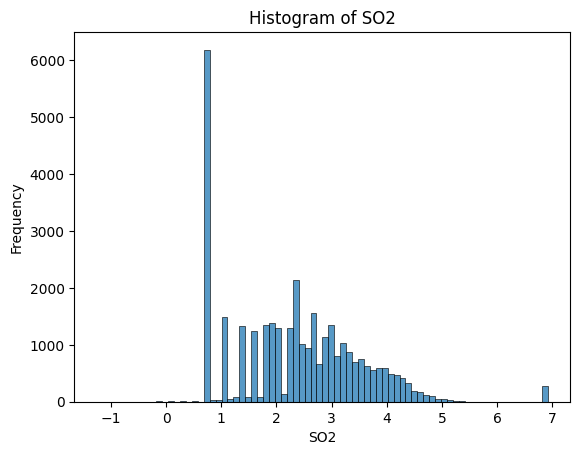

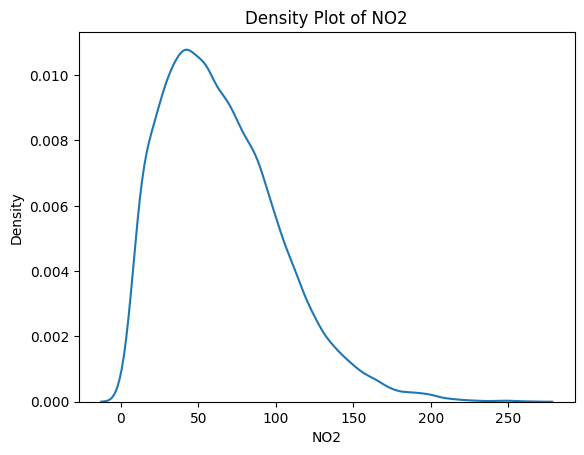

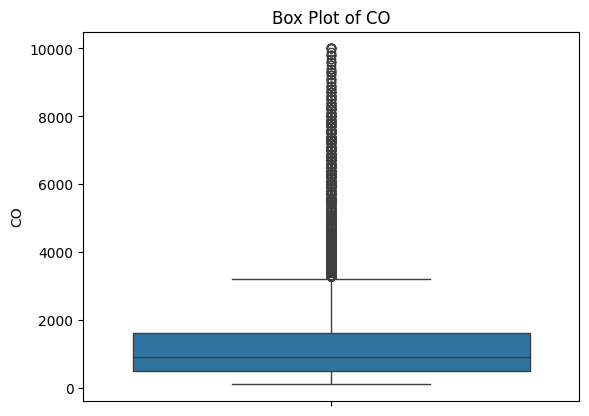

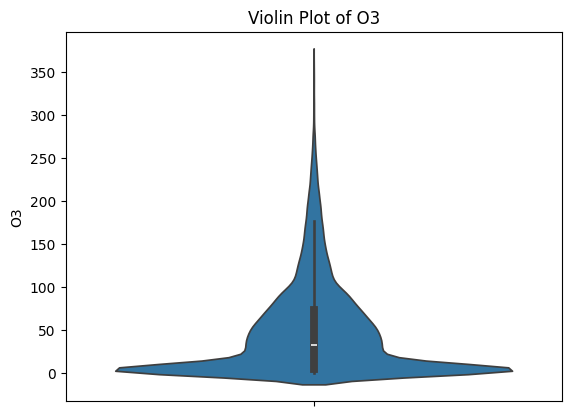

In [29]:
sns.histplot(prsa_data['SO2'].dropna(), kde=False)
plt.title('Histogram of SO2')
plt.xlabel('SO2')
plt.ylabel('Frequency')
plt.show()

sns.kdeplot(prsa_data['NO2'].dropna())
plt.title('Density Plot of NO2')
plt.xlabel('NO2')
plt.ylabel('Density')
plt.show()

sns.boxplot(y=prsa_data['CO'].dropna())
plt.title('Box Plot of CO')
plt.ylabel('CO')
plt.show()

sns.violinplot(y=prsa_data['O3'].dropna())
plt.title('Violin Plot of O3')
plt.ylabel('O3')
plt.show()


2. При выполнении 6 задания мы явно подбирали руками границы диапазона для клиппинга. Реализуйте адаптивный клиппинг через процентили.

In [30]:
# Функция для адаптивного клиппинга через процентили
def adaptive_clipping(df, columns, lower_percentile=1, upper_percentile=99):
    for col in columns:
        lower_bound = np.percentile(df[col].dropna(), lower_percentile)
        upper_bound = np.percentile(df[col].dropna(), upper_percentile)
        df[col] = np.clip(df[col], lower_bound, upper_bound)
    return df

# Определим численные столбцы
numeric_columns = ['SO2', 'NO2', 'CO', 'O3', 'PRES', 'WSPM']

# Применим адаптивный клиппинг к датасету
prsa_data_clipped = adaptive_clipping(prsa_data.copy(), numeric_columns)

# Выведем описательную статистику для проверки результатов
prsa_data_clipped.describe()

,Unnamed: 0,No,SO2,NO2,CO,O3,PRES,WSPM,IS_RAIN,CO_bin_custom_label
count,34180.000000,34180.000000,34180.000000,33478.000000,33152.000000,34180.000000,34180.000000,34180.000000,34180.000000,34180.000000
mean,17690.018929,17691.018929,2.323516,64.799150,1308.761131,48.640257,1011.043696,1.502627,0.041545,2.739321
std,10089.433202,10089.433202,1.145851,37.241732,1216.717646,53.986653,10.300581,1.078822,0.199549,0.687850
min,0.000000,1.000000,0.693147,7.000000,100.000000,1.000000,992.000000,0.000000,0.000000,0.000000
25%,9120.750000,9121.750000,1.386294,36.000000,500.000000,4.000000,1002.400000,0.800000,0.000000,3.000000
50%,17741.500000,17742.500000,2.302585,59.000000,900.000000,32.000000,1010.600000,1.300000,0.000000,3.000000
75%,26413.250000,26414.250000,3.135494,88.000000,1600.000000,73.000000,1019.400000,2.000000,0.000000,3.000000
max,35063.000000,35064.000000,5.081404,176.000000,6500.000000,236.000000,1032.000000,5.200000,1.000000,3.000000


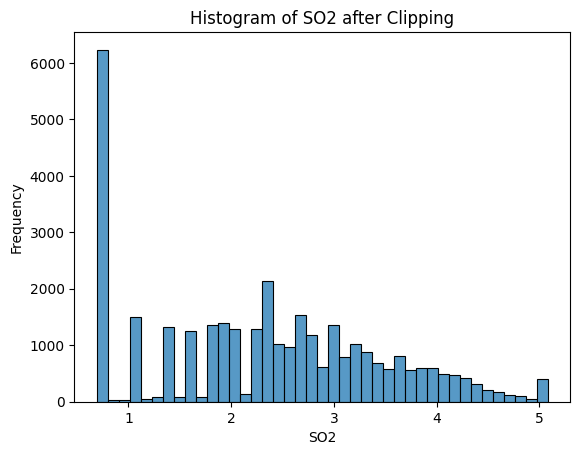

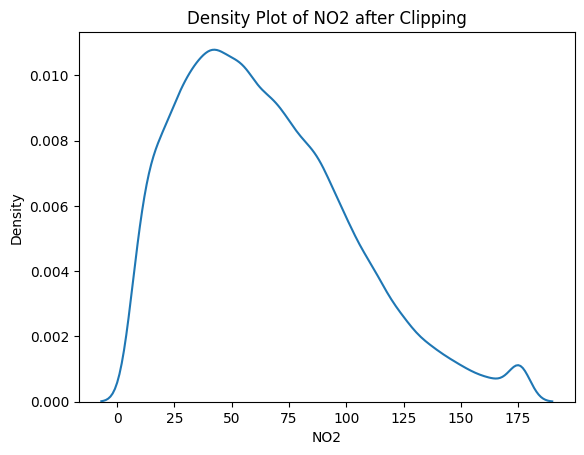

In [31]:
sns.histplot(prsa_data_clipped['SO2'].dropna(), kde=False)
plt.title('Histogram of SO2 after Clipping')
plt.xlabel('SO2')
plt.ylabel('Frequency')
plt.show()

sns.kdeplot(prsa_data_clipped['NO2'].dropna())
plt.title('Density Plot of NO2 after Clipping')
plt.xlabel('NO2')
plt.ylabel('Density')
plt.show()

3. Избавьтесь от оставшихся пропусков в данных. Самостоятельно выберите метод.

In [32]:
# Заполнение пропусков медианой для каждого численного признака
prsa_data_filled = prsa_data_clipped.copy()
for col in numeric_columns:
    prsa_data_filled[col] = prsa_data_filled[col].fillna(prsa_data_filled[col].median())

# Проверим, что пропусков больше нет
missing_values = prsa_data_filled.isnull().sum()

filled_description = prsa_data_filled.describe()

missing_values, filled_description

(Unnamed: 0             0
 No                     0
 SO2                    0
 NO2                    0
 CO                     0
 O3                     0
 PRES                   0
 wd                     0
 WSPM                   0
 AQI Label              0
 IS_RAIN                0
 CO_bin_custom_label    0
 dtype: int64,
          Unnamed: 0            No           SO2           NO2            CO  \
 count  34180.000000  34180.000000  34180.000000  34180.000000  34180.000000   
 mean   17690.018929  17691.018929      2.323516     64.680045   1296.467203   
 std    10089.433202  10089.433202      1.145851     36.866471   1200.312519   
 min        0.000000      1.000000      0.693147      7.000000    100.000000   
 25%     9120.750000   9121.750000      1.386294     36.000000    600.000000   
 50%    17741.500000  17742.500000      2.302585     59.000000    900.000000   
 75%    26413.250000  26414.250000      3.135494     87.000000   1500.000000   
 max    35063.000000  35064.00000

In [34]:
# Заполнение пропусков медианой для столбца RAIN
prsa_data_filled['IS_RAIN'] = prsa_data_filled['IS_RAIN'].fillna(prsa_data_filled['IS_RAIN'].median())

# Проверим, что пропусков больше нет
missing_values_after_rain_fill = prsa_data_filled.isnull().sum()

final_description = prsa_data_filled.describe()

missing_values_after_rain_fill, final_description

(Unnamed: 0             0
 No                     0
 SO2                    0
 NO2                    0
 CO                     0
 O3                     0
 PRES                   0
 wd                     0
 WSPM                   0
 AQI Label              0
 IS_RAIN                0
 CO_bin_custom_label    0
 dtype: int64,
          Unnamed: 0            No           SO2           NO2            CO  \
 count  34180.000000  34180.000000  34180.000000  34180.000000  34180.000000   
 mean   17690.018929  17691.018929      2.323516     64.680045   1296.467203   
 std    10089.433202  10089.433202      1.145851     36.866471   1200.312519   
 min        0.000000      1.000000      0.693147      7.000000    100.000000   
 25%     9120.750000   9121.750000      1.386294     36.000000    600.000000   
 50%    17741.500000  17742.500000      2.302585     59.000000    900.000000   
 75%    26413.250000  26414.250000      3.135494     87.000000   1500.000000   
 max    35063.000000  35064.00000

4. Проведите нормализацию численных признаков. Выберите наиболее подходящий вид нормализации для каждого признака.

In [35]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
import numpy as np

prsa_data_normalized = prsa_data_filled.copy()

numeric_columns = ['SO2', 'NO2', 'CO', 'O3', 'PRES', 'WSPM']

# Применим стандартную нормализацию для признаков с нормальным распределением
standard_scaler = StandardScaler()
prsa_data_normalized[['PRES', 'WSPM']] = standard_scaler.fit_transform(prsa_data_normalized[['PRES', 'WSPM']])

# Применим минимаксную нормализацию для признаков с распределением в широком диапазоне
minmax_scaler = MinMaxScaler()
prsa_data_normalized[['SO2', 'NO2', 'O3']] = minmax_scaler.fit_transform(prsa_data_normalized[['SO2', 'NO2', 'O3']])

# Применим нормализацию методом Робуста для признаков с выбросами
robust_scaler = RobustScaler()
prsa_data_normalized[['CO']] = robust_scaler.fit_transform(prsa_data_normalized[['CO']])

# Применим логарифмическую нормализацию для признаков с большой асимметрией (если необходимо)
prsa_data_normalized['CO'] = np.log1p(prsa_data_normalized['CO'])


normalized_description = prsa_data_normalized.describe()
normalized_description

,Unnamed: 0,No,SO2,NO2,CO,O3,PRES,WSPM,IS_RAIN,CO_bin_custom_label
count,34180.000000,34180.000000,34180.000000,34180.000000,34180.000000,34180.000000,3.418000e+04,3.418000e+04,34180.000000,34180.000000
mean,17690.018929,17691.018929,0.371530,0.341302,0.026477,0.202724,-1.138199e-14,-5.820713e-17,0.041545,2.739321
std,10089.433202,10089.433202,0.261117,0.218145,0.824920,0.229730,1.000015e+00,1.000015e+00,0.199549,0.687850
min,0.000000,1.000000,0.000000,0.000000,-2.197225,0.000000,-1.848825e+00,-1.392861e+00,0.000000,0.000000
25%,9120.750000,9121.750000,0.157955,0.171598,-0.405465,0.012766,-8.391588e-01,-6.513007e-01,0.000000,3.000000
50%,17741.500000,17742.500000,0.366760,0.307692,0.000000,0.131915,-4.307552e-02,-1.878255e-01,0.000000,3.000000
75%,26413.250000,26414.250000,0.556564,0.473373,0.510826,0.306383,8.112577e-01,4.610399e-01,0.000000,3.000000
max,35063.000000,35064.000000,1.000000,1.000000,1.977163,1.000000,2.034508e+00,3.427282e+00,1.000000,3.000000


5. Постройте кореллограмму по всем численным столбцам датасета. Сделайте вывод о значимости признаков.

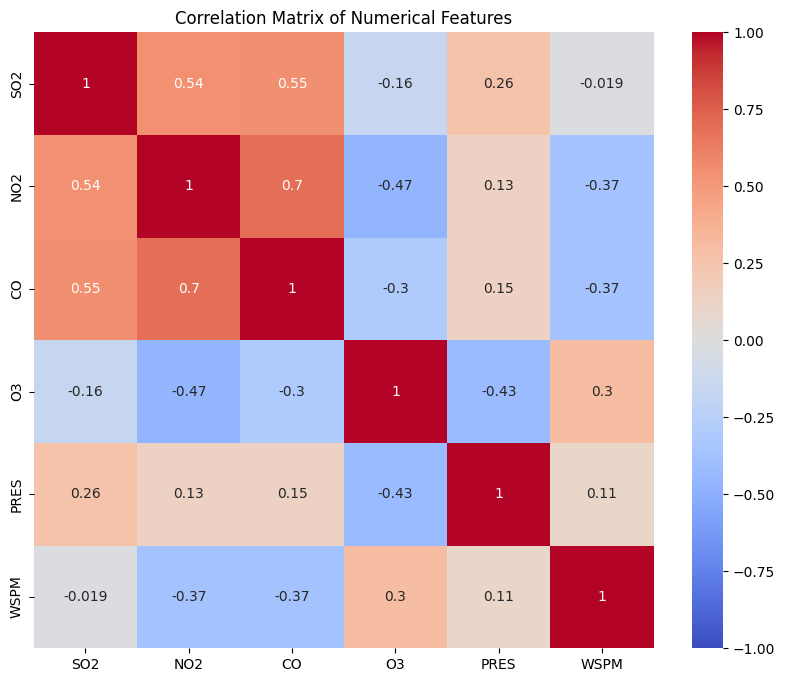

In [36]:
correlation_matrix = prsa_data_normalized[numeric_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

6. Визуализируйте связи между признаками. Сделайте вывод об их взаимозависимости.

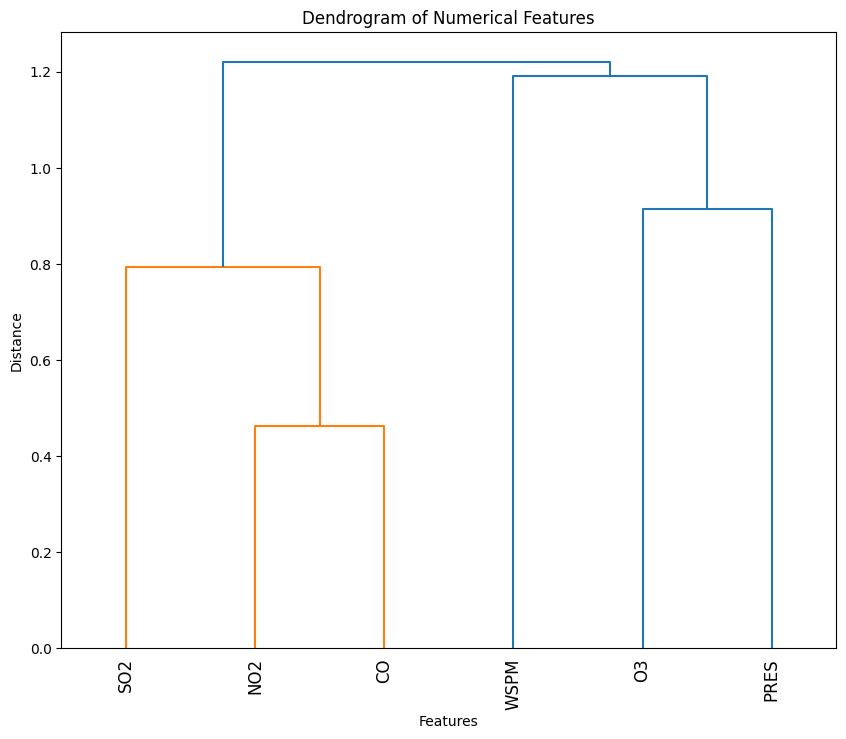

In [37]:
from scipy.cluster import hierarchy

correlation_matrix = prsa_data_normalized[numeric_columns].corr()

distance_matrix = 1 - np.abs(correlation_matrix)

Z = hierarchy.linkage(distance_matrix, method='average')

plt.figure(figsize=(10, 8))
hierarchy.dendrogram(Z, labels=numeric_columns, leaf_rotation=90)
plt.title('Dendrogram of Numerical Features')
plt.xlabel('Features')
plt.ylabel('Distance')
plt.show()
